In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM, Duality
from tqdm import tqdm
from IPython.display import clear_output

# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'

In [2]:
s = QBM(32)
d = Duality(s)

100%|██████████| 32/32 [00:56<00:00,  1.77s/it]


In [3]:
s.gen_harper_states()

In [4]:
d.gen_shifted_states()

In [5]:
(s.harper_states['evals'] + d.shifted_harper_states['evals']).real

array([3.99999999, 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 3.99999999])

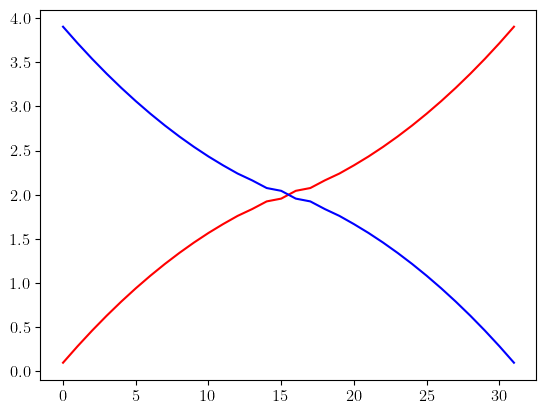

In [6]:
plt.plot(s.harper_states['evals'].real, 'r-')
plt.plot(d.shifted_harper_states['evals'].real, 'b-')
plt.show()

In [7]:
ev = s.harper_states['evals'].real
sh_ev = d.shifted_harper_states['evals'].real

In [8]:
N = s.N
print(ev[N//2 - 1])
print(ev[N//2])
print(sh_ev[N//2 - 1])
print(sh_ev[N//2])

1.9559086513179975
2.0440913486820067
2.044091348682007
1.9559086513179968


## Separatrix

In [9]:
Ns = np.arange(4, 65, 2)
syst = []
evecs = []
evals = []
d_eval = []
for _, N_ in enumerate(Ns):
    s_ = QBM(N_)
    s_.gen_harper_states()
    evecs.append(
        s_.harper_states['evecs'][N_//2-1 : N_//2+1]
    )
    evals.append(
        s_.harper_states['evals'][N_//2-1 : N_//2+1]
    )
    d_eval.append(np.diff(evals[-1].real)[0])
    syst.append(s_)

In [10]:
for _, N_ in enumerate(Ns):
    print(syst[_].N, np.round(d_eval[_], 10))

4 1.0823922003
6 0.0
8 0.4532256877
10 0.0
12 0.2780346064
14 0.0
16 0.197717389
18 0.0
20 0.1521693016
22 0.0
24 0.123035859
26 0.0
28 0.1028924611
30 0.0
32 0.0881826974
34 0.0
36 0.0769968092
38 0.0
40 0.0682206459
42 0.0
44 0.0611619017
46 0.0
48 0.0553684843
50 0.0
52 0.0505330604
54 0.0
56 0.0464396503
58 0.0
60 0.0429321779
62 0.0
64 0.0398951406


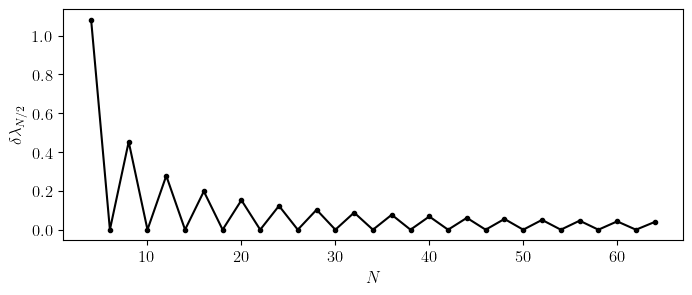

In [11]:
plt.figure(figsize=(8, 3))
plt.plot(Ns, d_eval, 'k.-')
plt.ylabel(r"$\delta \lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.show()

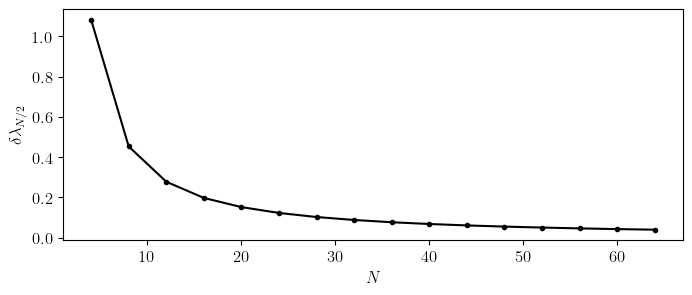

In [12]:
plt.figure(figsize=(8, 3))
plt.plot(Ns[::2], d_eval[::2], 'k.-')
plt.ylabel(r"$\delta \lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.show()

In [13]:
np.round(evals, 10).real

array([[1.4588039 , 2.5411961 ],
       [2.        , 2.        ],
       [1.77338716, 2.22661284],
       [2.        , 2.        ],
       [1.8609827 , 2.1390173 ],
       [2.        , 2.        ],
       [1.90114131, 2.09885869],
       [2.        , 2.        ],
       [1.92391535, 2.07608465],
       [2.        , 2.        ],
       [1.93848207, 2.06151793],
       [2.        , 2.        ],
       [1.94855377, 2.05144623],
       [2.        , 2.        ],
       [1.95590865, 2.04409135],
       [2.        , 2.        ],
       [1.9615016 , 2.0384984 ],
       [2.        , 2.        ],
       [1.96588968, 2.03411032],
       [2.        , 2.        ],
       [1.96941905, 2.03058095],
       [2.        , 2.        ],
       [1.97231576, 2.02768424],
       [2.        , 2.        ],
       [1.97473347, 2.02526653],
       [2.        , 2.        ],
       [1.97678017, 2.02321983],
       [2.        , 2.        ],
       [1.97853391, 2.02146609],
       [2.        , 2.        ],
       [1.

In [14]:
s1 = QBM(18)
s2 = QBM(20)

In [15]:
s1.gen_harper_states()
s2.gen_harper_states()

In [16]:
s1.harper_states['evals'][8:10]

array([2.-5.39932682e-17j, 2.-2.85012230e-31j])

In [32]:
np.round(np.linalg.eig(s1.H["H"])[0], 10).real

array([0.16701776, 0.48643062, 0.77715417, 3.83298224, 3.51356938,
       1.04016691, 1.27651097, 3.22284583, 1.48469418, 2.95983309,
       1.6741234 , 1.80640162, 2.72348903, 2.51530582, 2.19359838,
       2.3258766 , 2.        , 2.        ])

In [18]:
np.round(np.linalg.eig(s2.H["H"])[0], 10).real

array([0.15098505, 0.44106638, 3.84901495, 0.70778443, 3.55893362,
       0.95190394, 3.29221557, 1.17409518, 3.04809606, 1.37445741,
       2.82590482, 2.62554259, 1.55507416, 1.70599344, 2.44492584,
       1.86240193, 1.92391535, 2.29400656, 2.07608465, 2.13759807])

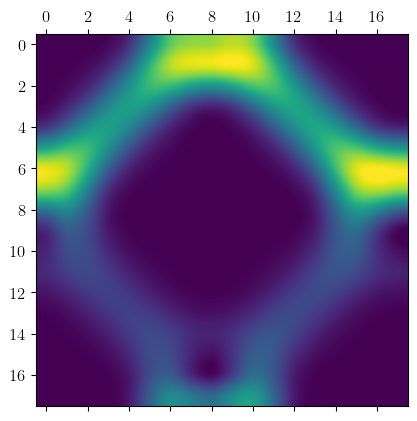

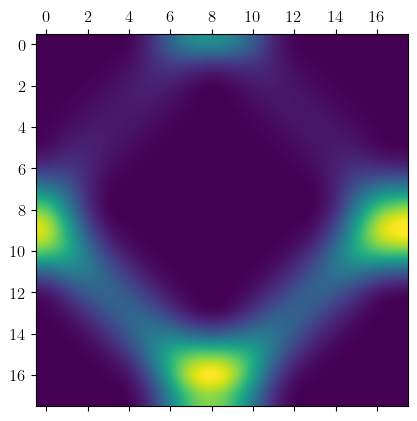

In [19]:
plt.matshow(np.abs(s1.gen_W(s1.harper_states['evecs'][8])), interpolation='spline16')
plt.matshow(np.abs(s1.gen_W(s1.harper_states['evecs'][9])), interpolation='spline16')
plt.show()

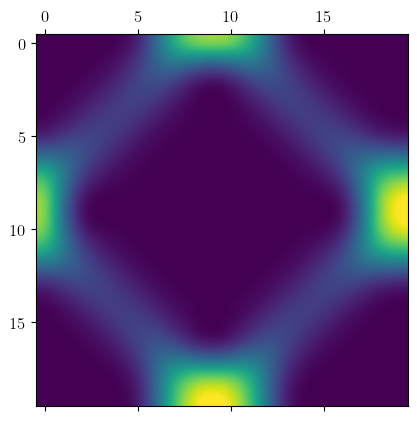

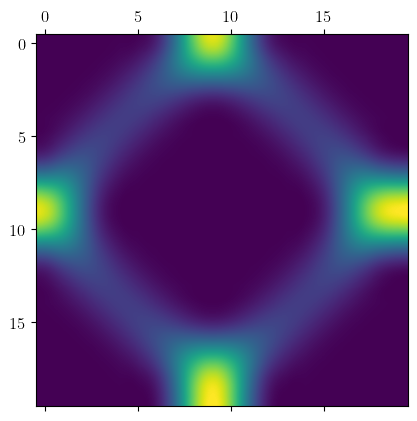

In [20]:
plt.matshow(np.abs(s2.gen_W(s2.harper_states['evecs'][9])), interpolation='spline16')
plt.matshow(np.abs(s2.gen_W(s2.harper_states['evecs'][10])), interpolation='spline16')
plt.show()

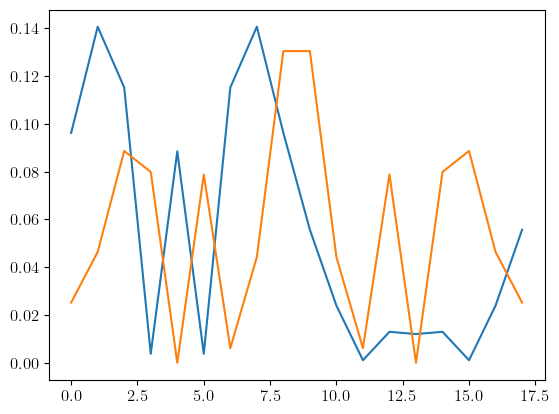

In [21]:
plt.plot(np.power(np.abs(s1.harper_states['evecs'][9]), 2))
plt.plot(np.power(np.abs(s1.harper_states['evecs'][10]), 2))
plt.show()

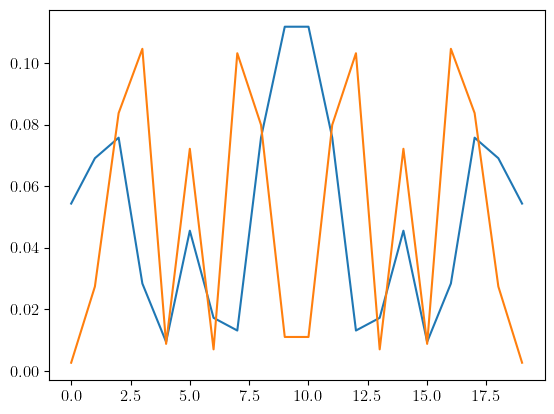

In [22]:
plt.plot(np.power(np.abs(s2.harper_states['evecs'][10]), 2))
plt.plot(np.power(np.abs(s2.harper_states['evecs'][11]), 2))
plt.show()

In [34]:
s3 = QBM(2)
s3.gen_harper_states()

In [35]:
s3.harper_states

{'N': 2,
 'evals': array([2.+0.j, 2.+0.j]),
 'evecs': [matrix([[0.        +0.56722313j],
          [0.82356416+0.j        ]]),
  matrix([[0.        -0.48294828j],
          [0.87564888+0.j        ]])]}